In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Algerian Forest Fires Dataset

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia
region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of
Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output
attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106
classes) classes.

#### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data
observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/refs/heads/main/3-Complete%20Linear%20Regression/Practicals/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Cleaning the Dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
# fetching data where nan is.
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we
can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region.

In [7]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [8]:
df['Region'] = df['Region'].astype('int')

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [10]:
# Remove the null values

df = df.dropna().reset_index(drop=True)

In [11]:
df = df.drop(122).reset_index(drop=True)

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
# column names spaces
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0


In [15]:
# change the data astype
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype('int')

In [16]:
objects = [cols for cols in df.columns if df[cols].dtype == 'O']

for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [18]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#### EDA and Feature Engineering

In [20]:
## Save the cleaned file.I will to it later
# df.to_csv('Cleaned_datafile.csv, index = False')

In [21]:
#EDA

df1 = df.drop(['day','month','year'],axis=1)

In [22]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df1['Classes'] = df1['Classes'].str.strip()

In [24]:
df1['Classes'] = df1['Classes'].replace({"not fire":0,"fire":1}).astype(int)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_26172\212387355.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Classes'] = df1['Classes'].replace({"not fire":0,"fire":1}).astype(int)


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

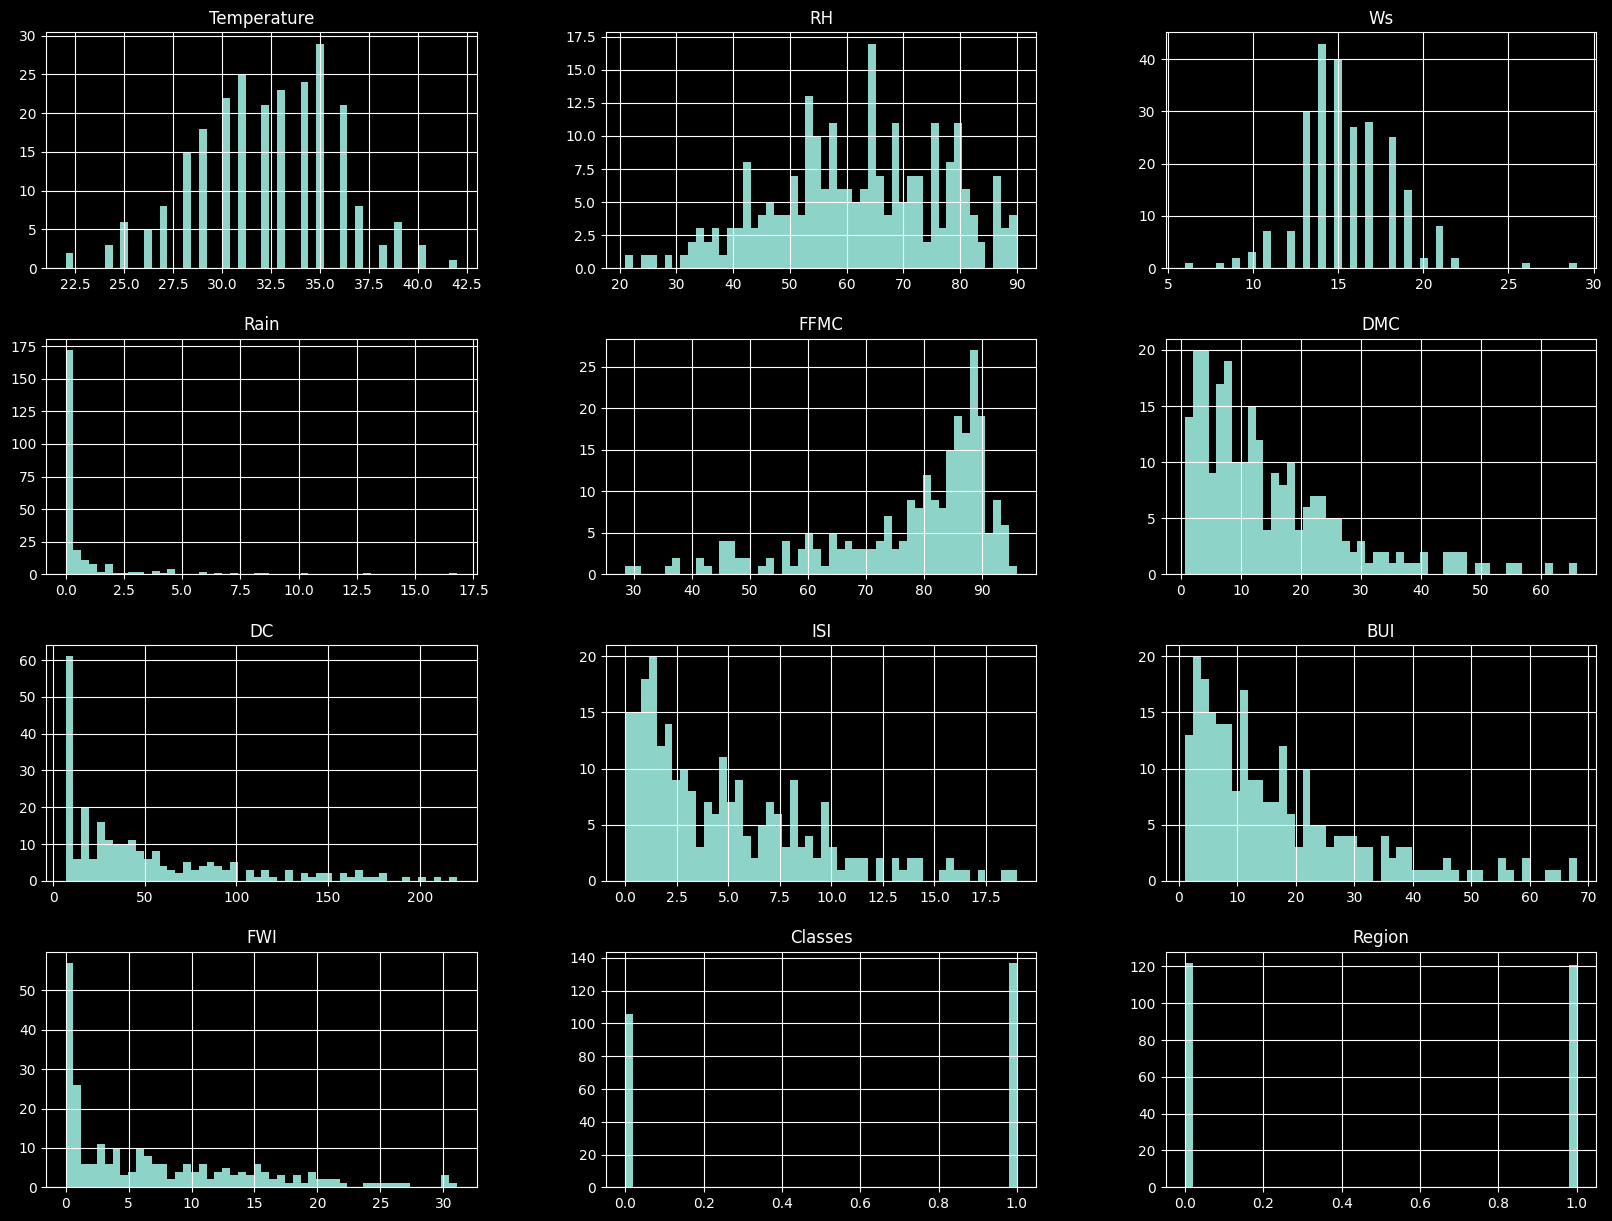

In [25]:
df1.hist(bins=50,figsize=(20,15))

In [26]:
# Normalize gives us the percentage
per = df1['Classes'].value_counts(normalize=True) * 100

Text(0.5, 1.0, 'Pie Chart')

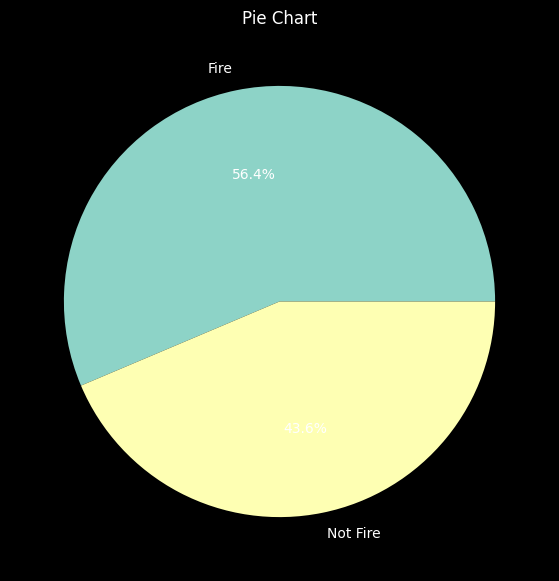

In [27]:
labels = ['Fire', 'Not Fire']
plt.figure(figsize=(12,7))
plt.pie(per,labels = labels,autopct='%0.1f%%')
plt.title('Pie Chart')

In [28]:
# Correlation 

df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

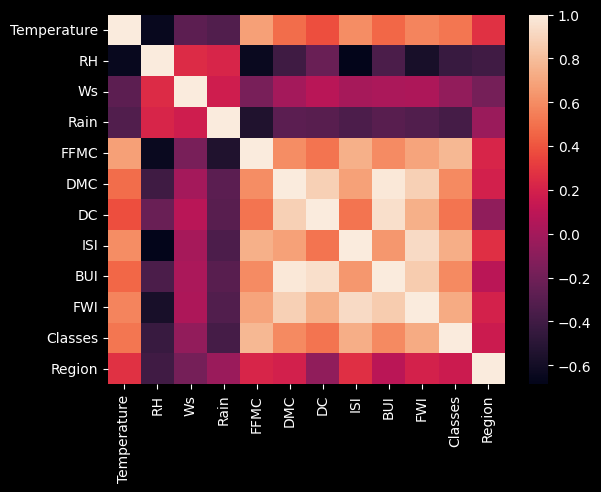

In [29]:
#correlation
sns.heatmap(df1.corr())

<Axes: ylabel='FWI'>

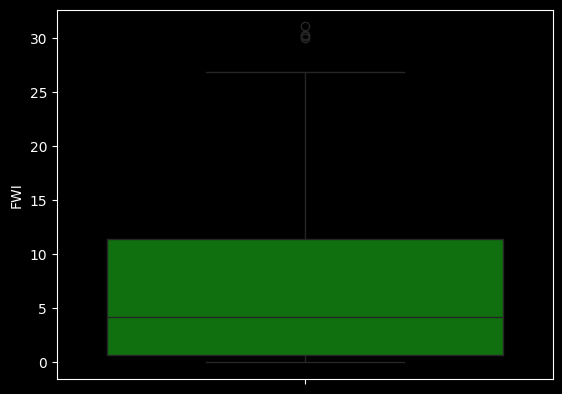

In [30]:
sns.boxplot(df['FWI'],color = 'green')

In [31]:
df['Classes'] = df['Classes'].str.strip()

Text(0.5, 1.0, 'Fire Analysis Sidi-Bel Region')

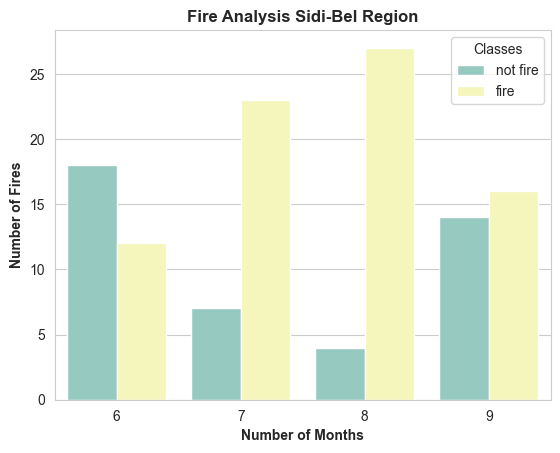

In [32]:
## Monthy Fire Analysis

temp = df.loc[df['Region'] == 1]
# plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue='Classes', data=temp)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Number of Months', weight = 'bold')
plt.title('Fire Analysis Sidi-Bel Region',weight = 'bold')

Text(0.5, 1.0, 'Fire Analysis Brjaia Region')

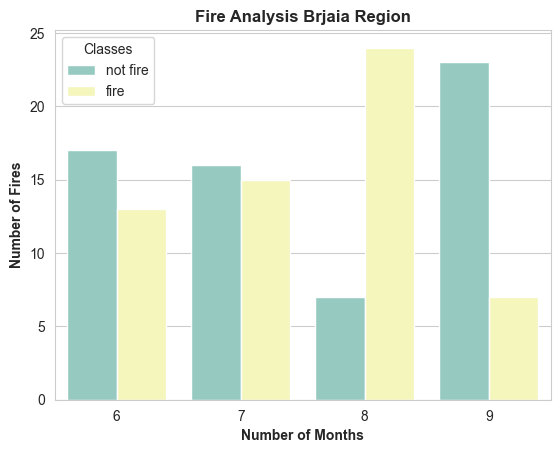

In [33]:
temp = df.loc[df['Region'] == 0]
# plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue='Classes', data=temp)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Number of Months', weight = 'bold')
plt.title('Fire Analysis Brjaia Region',weight = 'bold')

Its observed that August and September had the most number of forest fires
for both regions. And from the above plot of months, we can understand few
things

Most of the fires happened in August and very high Fires happened in only 3
months - June, July and August.

Less Fires was on September

### Machine Learning


In [34]:
import sklearn

In [35]:
# Independent and Dependent features

x = df1.drop(columns=['FWI'])
y = df1['FWI']

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

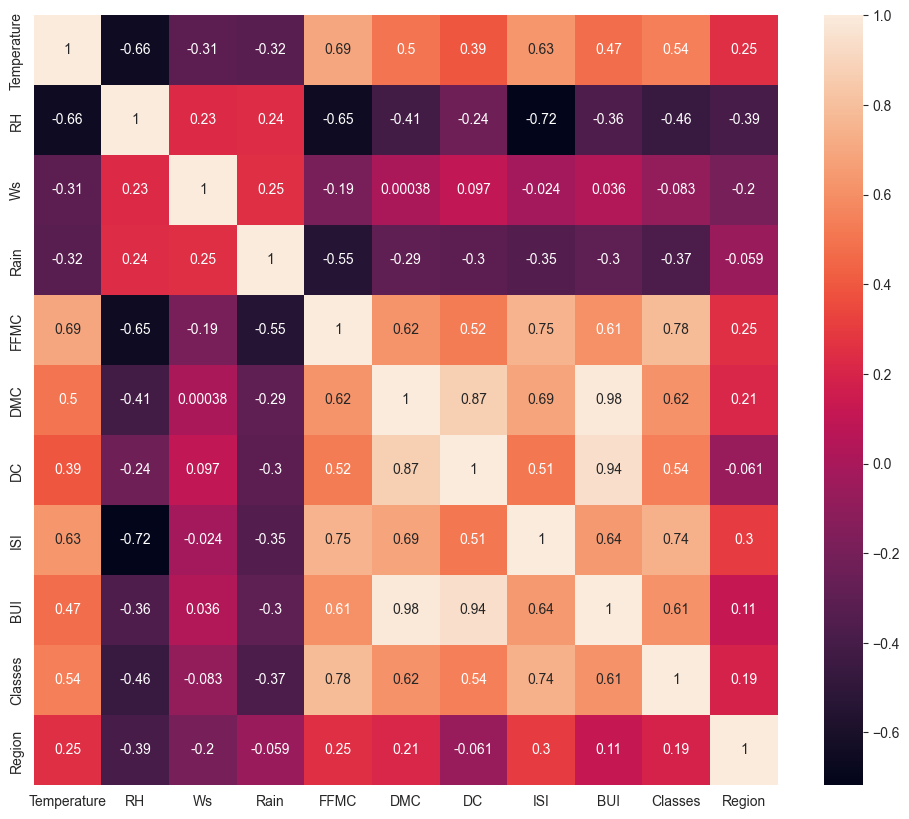

In [38]:
# multicollinearity

plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [39]:
# Custom code for fetching correaltions
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix. columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
#threshold -- Domain Expert set those
corr_featueres = correlation(x_train,0.85)

In [41]:
# drop those featue where corr is more than 0.85

x_train.drop(corr_featueres,axis=1, inplace=True)
x_test.drop(corr_featueres,axis=1, inplace=True)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Text(0.5, 1.0, 'X_train Before Scaling')

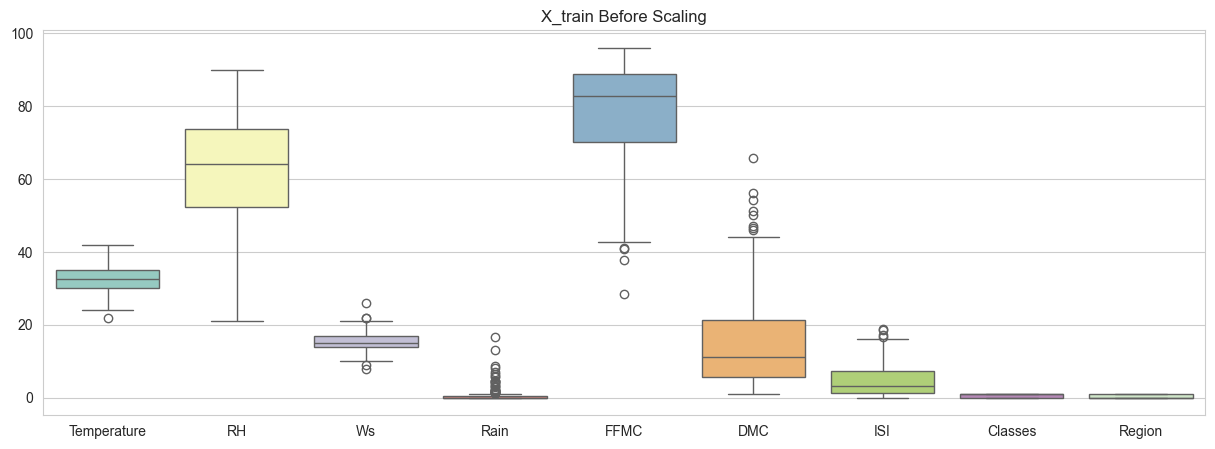

In [ ]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=x_train)
plt. title('X_train Before Scaling')

Text(0.5, 1.0, 'X_train After Scaling')

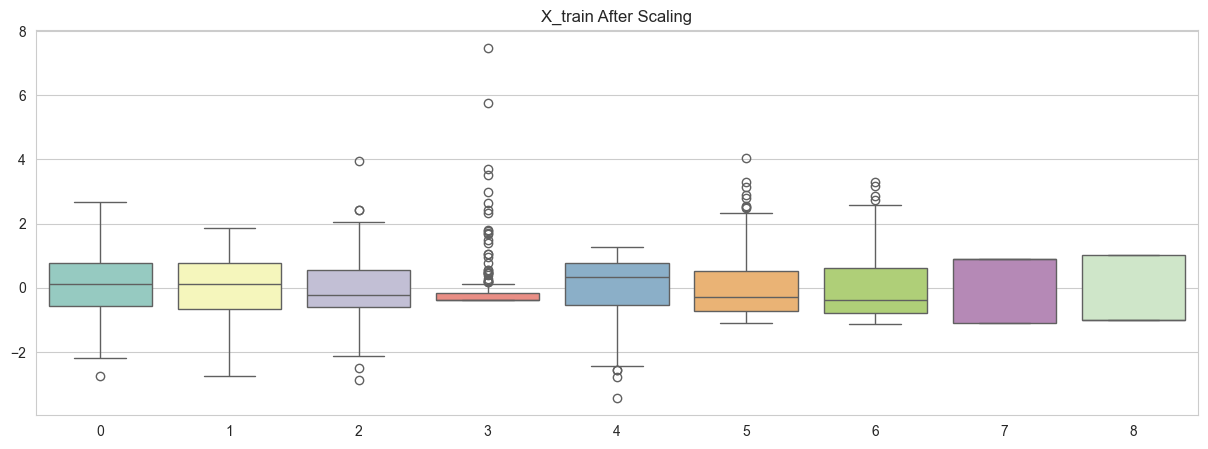

In [44]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=x_train_scaled)
plt. title('X_train After Scaling')

### Model Training

Mean Absolute Error 0.5468236465249978
r2_score 0.9839977157632893


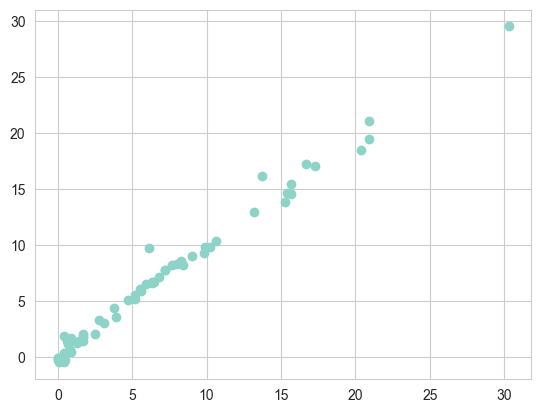

In [45]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
pred = lr.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

Mean Absolute Error 1.133175994914409
r2_score 0.926474232680569


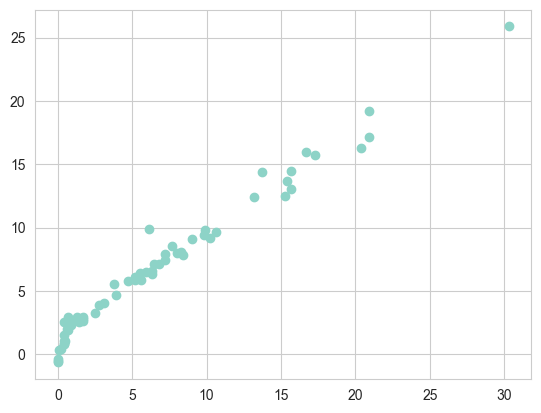

In [46]:
## Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lr = Lasso()
lr.fit(x_train_scaled,y_train)
pred = lr.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

Mean Absolute Error 1.133175994914409
r2_score 0.926474232680569


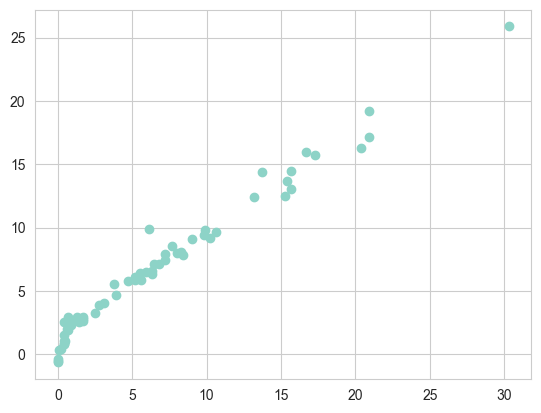

In [47]:
### Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
pred = lr.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

Mean Absolute Error 1.8822353634896005
r2_score 0.7814447243400926


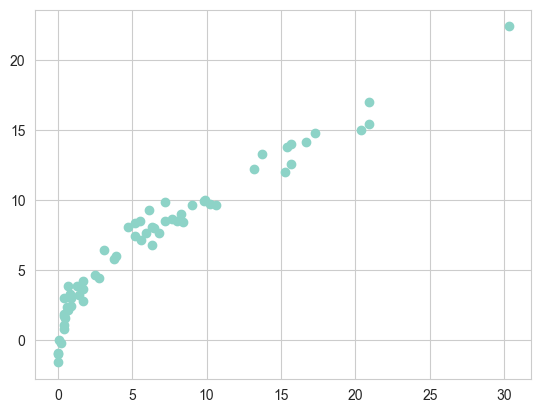

In [48]:
### Elastinet Regression - Both ridge,lasso


from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

lr = ElasticNet()
lr.fit(x_train_scaled,y_train)
pred = lr.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

### Cross Validation

In [49]:
# For Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

cr = LassoCV(cv=5)
cr.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [50]:
# Choosen Alpha Values
cr.alpha_

np.float64(0.05725391318234408)

In [51]:
# Alpha values tried on
cr.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [52]:
cr.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error 0.619970115826343
r2_score 0.980851982434192


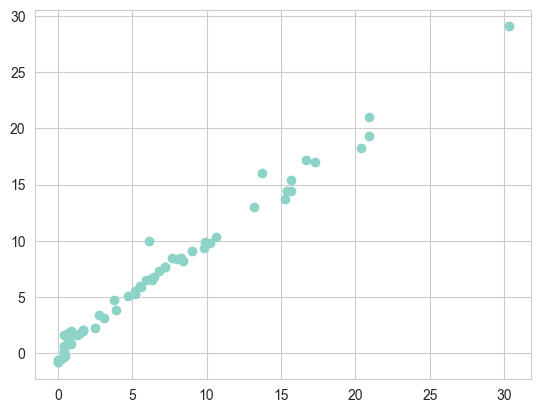

In [53]:
pred = cr.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

Mean Absolute Error 0.5642305340105715
r2_score 0.9834070933284211


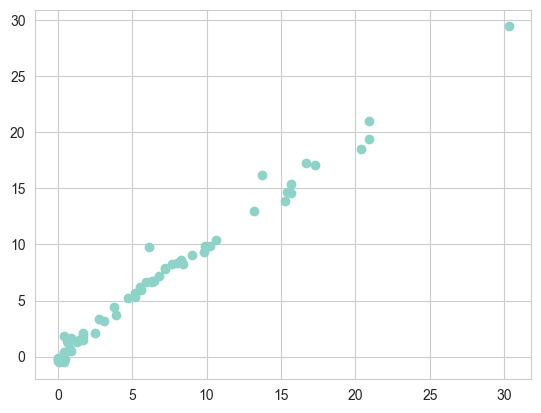

In [54]:
# For Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score

ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)

pred = ridge.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

In [55]:
ridgecv.alpha_

np.float64(1.0)

In [56]:
ridgecv.alphas

(0.1, 1.0, 10.0)

Mean Absolute Error 0.6575946731430898
r2_score 0.9799084998743879


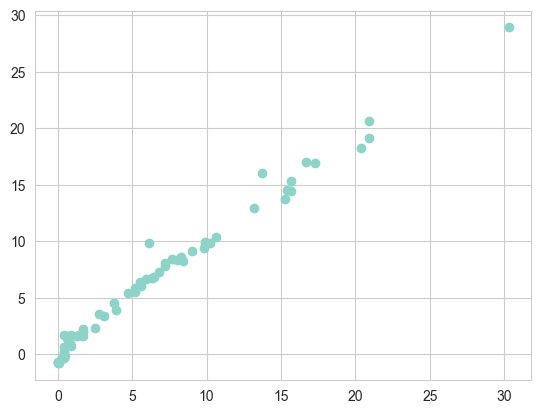

In [57]:
### For Elastic net
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score

elastic = ElasticNetCV(cv=5)
elastic.fit(x_train_scaled,y_train)

pred = elastic.predict(x_test_scaled)

mae = mean_absolute_error(pred,y_test)
score = r2_score(pred,y_test)

print('Mean Absolute Error',mae)
print('r2_score',score)

plt.scatter(y_test,pred)

In [58]:
elastic.alpha_

np.float64(0.04311146156383891)

In [59]:
elastic.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

    Pickle the Machine Learning Models, preprossing model standardscaler

In [60]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))